# BUSINESS DOMAIN

The business domains for which it can be used are: Financial services, marketing and advertising, social research, demographic studies etc.

#  ABOUT DATASET:

This dataset is called "census income dataset" also known as the "Adult" dataset and is taken from UCI's data repository. It has total 14 columns, the last one is the classifier named "income" which classifies if the person has an income greater than or less than $50K. The rest 13 attributes are:

Age: The age of the individual, represented as a continuous variable.

Workclass: The type of employment or work class of the individual, such as Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

FNLWGT: It is not given in the description that what this column refers too.

Education: The highest level of education completed by the individual, ranging from preschool to doctoral degrees.

Education Number: The numerical representation of the highest level of education completed.

Marital Status: The marital status of the individual, such as Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

Occupation: The type of occupation of the individual, such as Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

Relationship: The relationship status of the individual in the household, such as Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

Race: The race of the individual, such as White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

Sex: The gender of the individual, represented as Male or Female.

Capital Gain: The capital gains (profits from the sale of assets) reported by the individual.

Capital Loss: The capital losses (losses from the sale of assets) reported by the individual.

Hours per Week: The average number of hours worked per week by the individual.

Native Country: The native country of the individual, such as United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

# NECESSARY IMPORTS

In [155]:
import pandas as pd
import requests
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# LOADING DATASET

In [152]:
def load_census_income_data(url):
   
    # Fetch the data from the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Read the data into a Pandas DataFrame
        df = pd.read_csv(url, header=None, skipinitialspace=True)

        return df
    else:
        # If the request was not successful, print an error message
        print("Failed to retrieve data. Status code:", response.status_code)
        return None



# CLEANING DATA

In [140]:
def clean_census_income_data(df):
    
    # Replace '?' with NaN for missing values
    df.replace(' ?', pd.NA, inplace=True)

    # Drop rows with missing values
    df.dropna(inplace=True)

    # Remove unnecessary columns (for example purposes, adjust as needed)
    # Here, we're removing the 'fnlwgt' column
    df.drop(columns=[2], inplace=True)

    # Data entry errors: Correct any data entry errors if found

    # Convert columns to appropriate data types if needed

    # Additional cleaning steps can be added as per specific requirements

    return df


# TRANSFORMING DATA

In [141]:
def transform_census_income_data(df):
   
    # Change feature names
    df.columns = ['age', 'workclass', 'education', 'education_num', 'marital_status', 
                  'occupation', 'relationship', 'race', 'sex', 'capital_gain', 
                  'capital_loss', 'hours_per_week', 'native_country', 'income']

    # Categorical encoding for 'income' column (target variable)
    label_encoder = LabelEncoder()
    df['income'] = label_encoder.fit_transform(df['income'])

    # Categorical encoding for other categorical columns
    categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 
                        'relationship', 'race', 'sex', 'native_country']
    for col in categorical_cols:
        df[col] = label_encoder.fit_transform(df[col])

    # Standardization of numerical features using z-score normalization
    scaler = StandardScaler()
    numerical_cols = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    return df

# PERFORMING EDA

In [142]:
def eda_census_income_data(df):
   
    # Summary statistics
    summary_stats = df.describe()
    print("Summary Statistics:")
    print(summary_stats)

    # Histograms of important numerical variables
    numerical_cols = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
    
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Boxplots of important numerical variables
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, y=col)
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)
        plt.show()
    
     # Heatmap of correlation matrix
        
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap of Numerical Variables')
    plt.show()



# EDA RESULTS

# DETECTING OUTLIERS

In [143]:
def detect_outliers_zscore(df, threshold=3):
   
    from scipy.stats import zscore

    # Compute z-scores for numerical variables
    z_scores = df.apply(zscore)

    # Identify outliers based on z-score threshold
    outliers = (z_scores > threshold) | (z_scores < -threshold)

    return outliers



# SPLITTING DATA

In [144]:
def split_data(data, test_size=0.15, val_size=0.1765, random_state=40):
    # Split the data into train and test sets
    train_data, test_data = train_test_split(data, test_size=test_size, random_state=random_state)
    
    # Calculate the proportion of validation data
    val_size = val_size / (1 - test_size)
    
    # Split the train data into train and validation sets
    train_data, val_data = train_test_split(train_data, test_size=val_size, random_state=random_state)
    
    return train_data, val_data, test_data


# SELECTING FEATURES FOR KNN

In [145]:

def select_features_knn(df, target_column, n_features=10):
    
    # Separate features and target variable
    X = df.drop(columns=[target_column,"native_country","workclass","race"])
    y = df[target_column]

    # Scale features to range [0, 1] using MinMaxScaler
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Train KNN classifier
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_scaled, y)

    # Select top features using chi-squared test
    selector = SelectKBest(score_func=chi2, k=n_features)
    selector.fit(X_scaled, y)

    # Get indices of top features
    top_indices = selector.get_support(indices=True)

    # Get top feature names
    top_features = X.columns[top_indices].tolist()

    return top_features


# APPLYING PCA

In [146]:
def apply_pca(df, n_components=2):
    
    # Initialize PCA with the specified number of components
    pca = PCA(n_components=n_components)

    # Fit PCA and transform the data
    reduced_features = pca.fit_transform(df)

    # Create a DataFrame with the reduced features
    reduced_df = pd.DataFrame(reduced_features, columns=[f'PC{i+1}' for i in range(n_components)])

    return reduced_df


# PERFORMING CROSS VALIDATION

In [147]:
def perform_cross_validation(model, X, y, cv=5):
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=cv)

    # Calculate the mean cross-validation score
    mean_cv_score = cv_scores.mean()
    print("Cross-validation scores:", cv_scores)
    print("Mean CV score:", mean_cv_score)

    return cv_scores, mean_cv_score


# USING LAZY PREDICT

In [148]:
X = transformed_census_income_df.drop(columns=['income'])
y = transformed_census_income_df['income']

def lazy_classifier_performance(X, y, test_size=0.2, random_state=42):
   
   
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize LazyClassifier
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

    # Fit LazyClassifier
    models, predictions = clf.fit(X_train, X_test, y_train, y_test)

    return models, predictions




# GRID SEARCH FOR KNN

In [149]:
def grid_search_knn(X, y, param_grid, test_size=0.2, random_state=42, cv=5, scoring='accuracy'):
   
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize KNN classifier
    knn_classifier = KNeighborsClassifier()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=-1, verbose=2)

    # Fit GridSearchCV to training data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    return best_params, best_score


# MASTER FUNCTION WITH ML AND MODEL EVALUATION

In [153]:
def master(url, threshold=3, n_features=10, n_components=2):
    # Load census income data
    df = load_census_income_data(url)
    
    # Clean census income data
    df = clean_census_income_data(df)
    
    # Transform census income data
    df = transform_census_income_data(df)
    
    # Perform exploratory data analysis
    eda_census_income_data(df)
    
    # Detect outliers using Z-score
    outliers = detect_outliers_zscore(df, threshold)
    # Display the outliers
    print("Outliers detected using z-score method:")
    print(outliers_zscore.any(axis=1).sum())
    print(outliers_zscore[outliers_zscore.any(axis=1)])
    
    # Select features using KNN
    selected_features = select_features_knn(df, 'income', n_features)
    
    # Apply PCA
    pca_df = apply_pca(df, n_components)
    
    # Apply cross validation
    model = LogisticRegression()
    cv_scores, mean_cv_score = perform_cross_validation(model, train_data.drop(columns=['income']), train_data['income'])
    
    #lazy classifier predictions
    models, predictions = lazy_classifier_performance(X, y)
    
    #grid search KNN for best parameters
    best_params, best_score = grid_search_knn(X, y, param_grid)
    
    #fitting knn
    knn_classifier = KNeighborsClassifier(n_neighbors=5)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_val)
    
    # Obtain predictions from the classifier
    y_pred = knn_classifier.predict(X_val)

    # Calculate evaluation metrics
    print("Classification Report:")
    print(classification_report(y_val, y_pred))

    accuracy = accuracy_score(y_val, y_pred)
    print("Accuracy:", accuracy)

    auc = roc_auc_score(y_val, y_pred)
    print("AUC Score:", auc)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
    # Obtain predictions from the regressor
    y_pred = knn_classifier.predict(X_val)

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print("Root Mean Squared Error (RMSE):", rmse)

    mse = mean_squared_error(y_val, y_pred)
    print("Mean Squared Error (MSE):", mse)

    mae = mean_absolute_error(y_val, y_pred)
    print("Mean Absolute Error (MAE):", mae)

    r2 = r2_score(y_val, y_pred)
    print("R2 Score:", r2)

    n = len(X_val)
    p = X_val.shape[1]
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    print("Adjusted R2 Score:", adjusted_r2)

    return pca_df, selected_features


# CALLING THE MASTER FUNCTION

Summary Statistics:
           age  workclass  education  education_num  marital_status  \
count 32561.00   32561.00   32561.00       32561.00        32561.00   
mean     -0.00       3.87      10.30           0.00            2.61   
std       1.00       1.46       3.87           1.00            1.51   
min      -1.58       0.00       0.00          -3.53            0.00   
25%      -0.78       4.00       9.00          -0.42            2.00   
50%      -0.12       4.00      11.00          -0.03            2.00   
75%       0.69       4.00      12.00           0.75            4.00   
max       3.77       8.00      15.00           2.30            6.00   

       occupation  relationship     race      sex  capital_gain  capital_loss  \
count    32561.00      32561.00 32561.00 32561.00      32561.00      32561.00   
mean         6.57          1.45     3.67     0.67          0.00          0.00   
std          4.23          1.61     0.85     0.47          1.00          1.00   
min          0.0

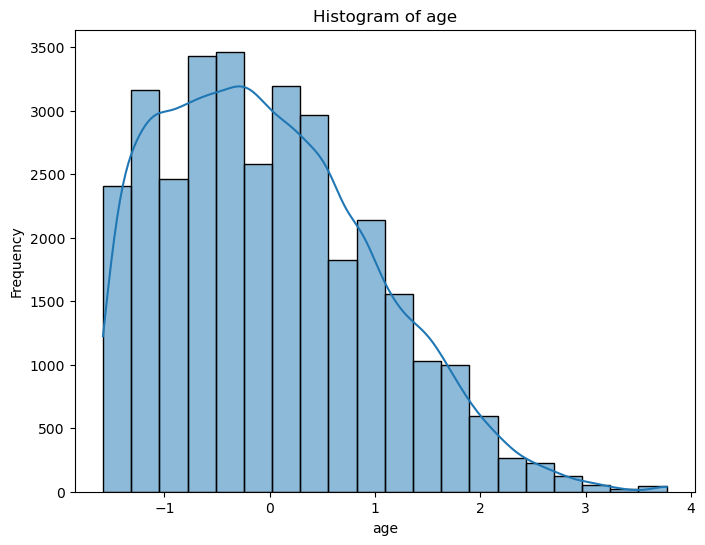

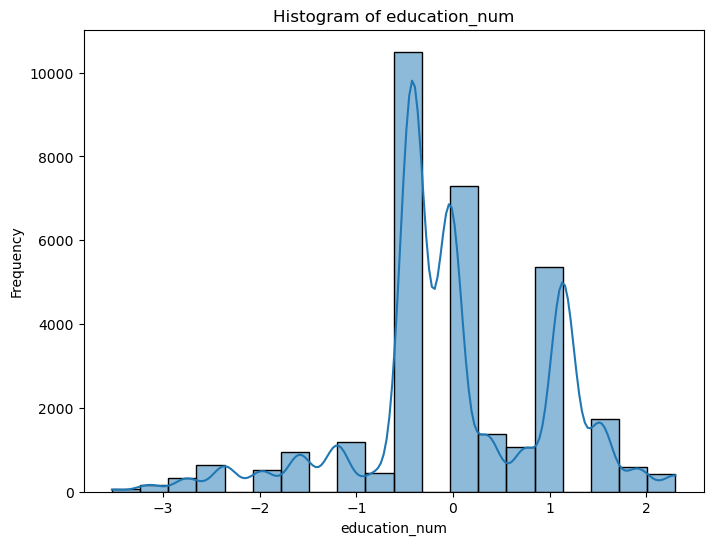

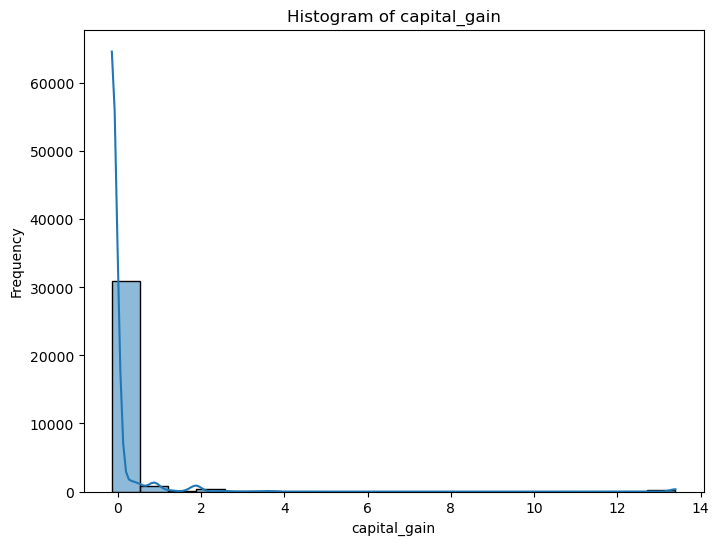

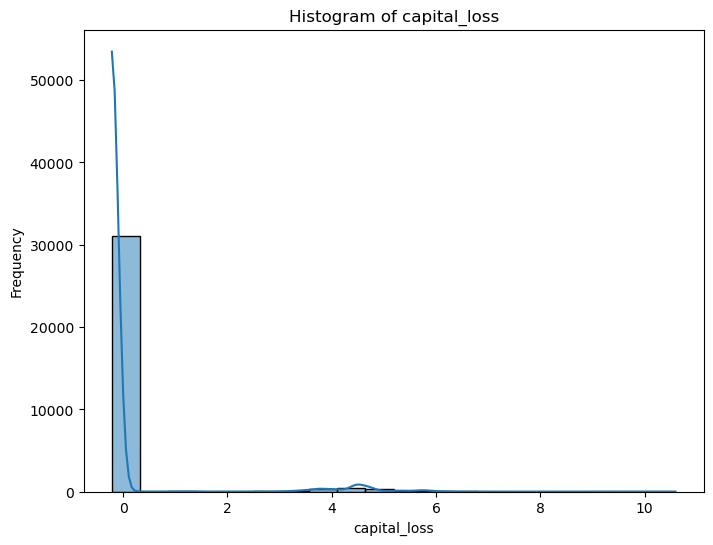

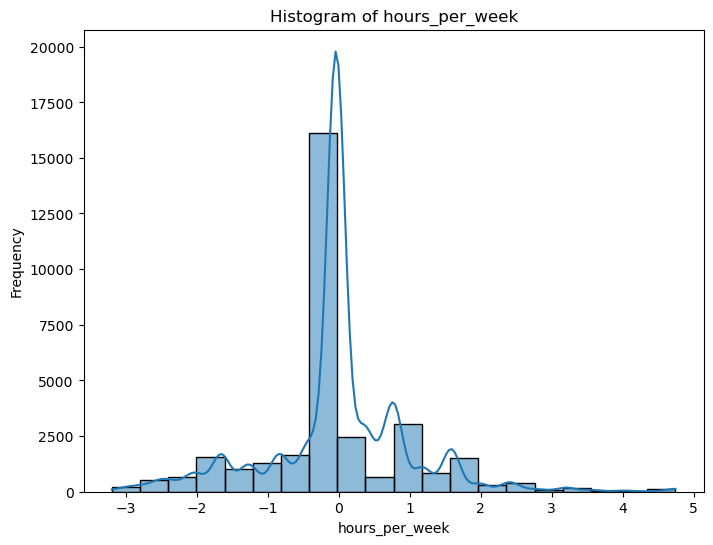

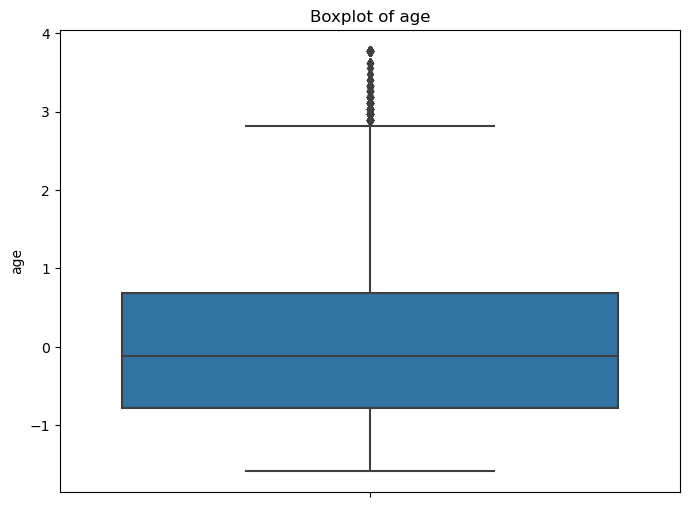

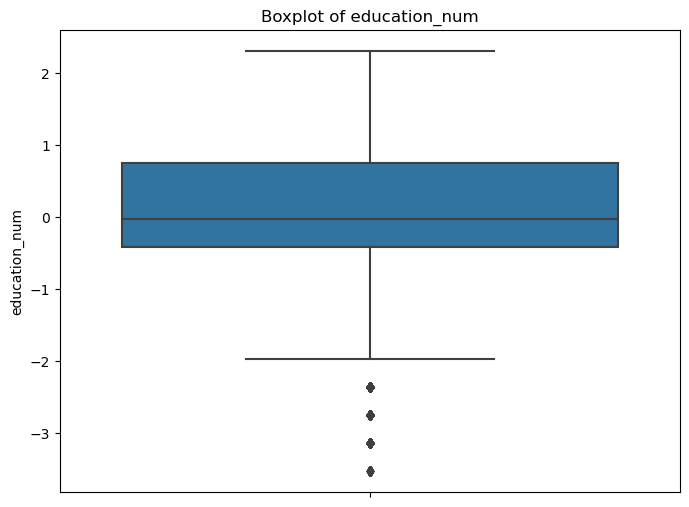

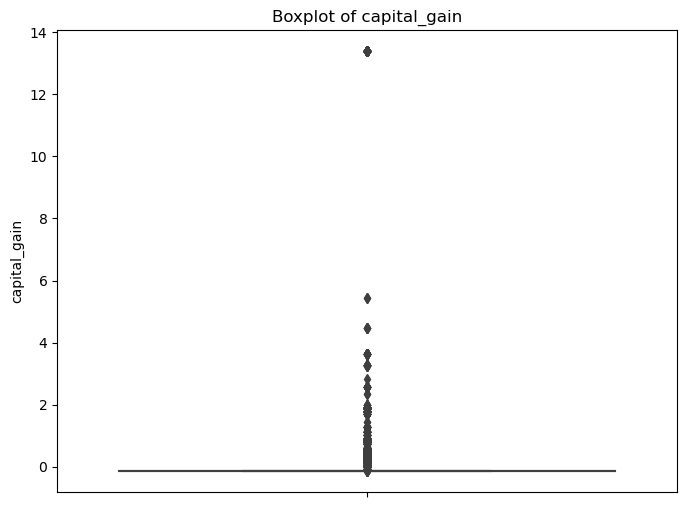

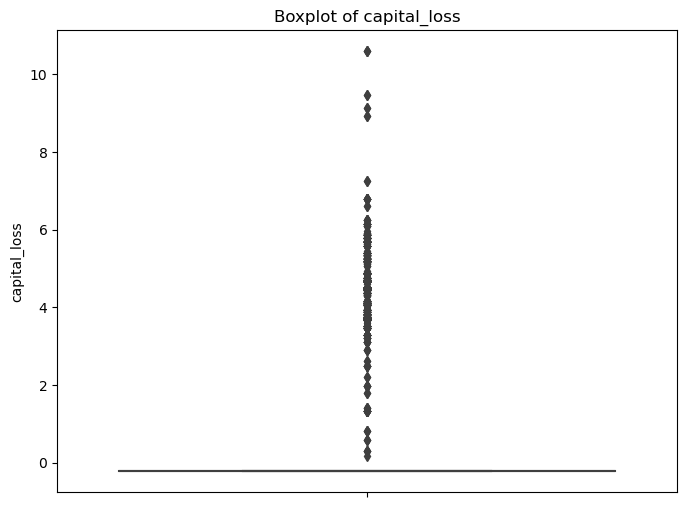

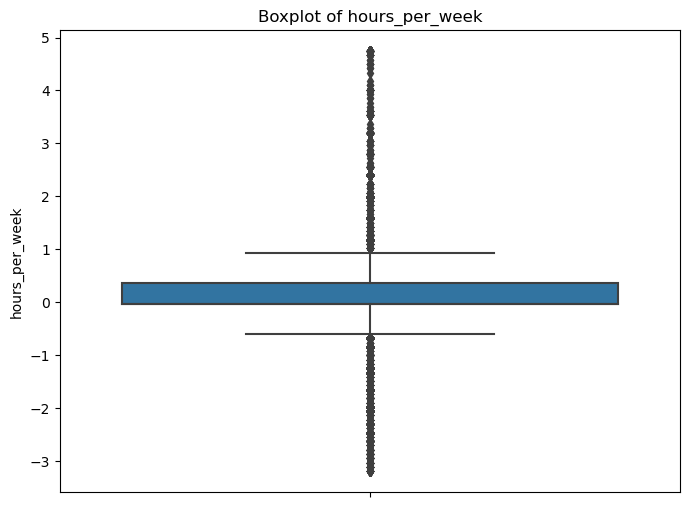

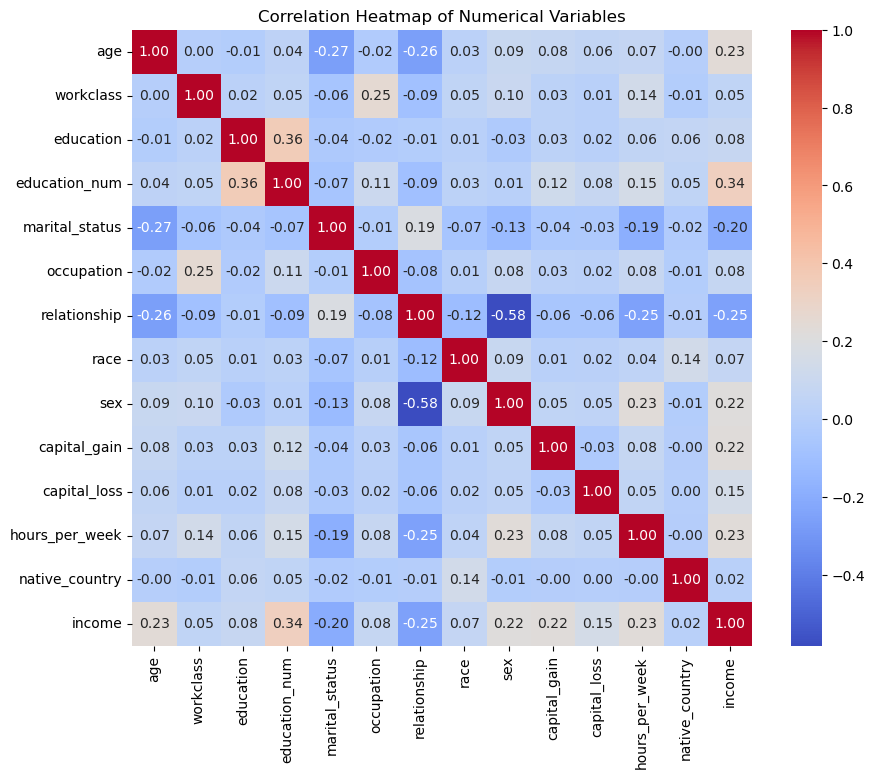

Outliers detected using z-score method:
2410
         age  education_num  capital_gain  capital_loss  hours_per_week
10     False          False         False         False            True
23     False          False         False          True           False
28     False          False         False         False            True
32     False          False         False          True           False
52     False          False         False          True           False
...      ...            ...           ...           ...             ...
32476  False          False         False         False            True
32494   True          False         False         False            True
32518  False          False          True         False           False
32525   True          False         False         False            True
32531  False          False         False         False            True

[2410 rows x 5 columns]
Cross-validation scores: [0.82991336 0.82421341 0.83128135 0.82375

 97%|█████████▋| 28/29 [08:45<00:11, 11.98s/it] 

[LightGBM] [Info] Number of positive: 6270, number of negative: 19778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 26048, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240709 -> initscore=-1.148794
[LightGBM] [Info] Start training from score -1.148794


100%|██████████| 29/29 [08:46<00:00, 18.14s/it]


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4942
           1       0.66      0.58      0.62      1571

    accuracy                           0.83      6513
   macro avg       0.77      0.74      0.75      6513
weighted avg       0.82      0.83      0.82      6513

Accuracy: 0.8269614616920006
AUC Score: 0.7416091589233325


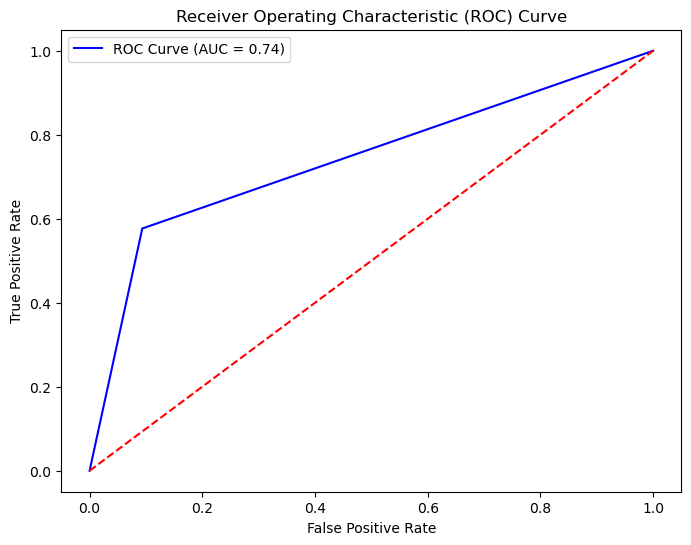

Root Mean Squared Error (RMSE): 0.4159790118599728
Mean Squared Error (MSE): 0.1730385383079994
Mean Absolute Error (MAE): 0.1730385383079994
R2 Score: 0.05457720763916818
Adjusted R2 Score: 0.05268607111036516


(        PC1   PC2
 0     -2.28 -5.04
 1     -2.26 -2.17
 2     -2.33 -0.56
 3     -1.86  0.29
 4     31.79  2.99
 ...     ...   ...
 32556 -2.09  6.57
 32557 -2.31  0.46
 32558 -2.34 -5.67
 32559 -2.36 -5.64
 32560 -2.33 -2.59
 
 [32561 rows x 2 columns],
 ['age',
  'education',
  'education_num',
  'marital_status',
  'occupation',
  'relationship',
  'sex',
  'capital_gain',
  'capital_loss',
  'hours_per_week'])

In [154]:
master(url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
threshold = 3 ,
n_features = 10 ,
n_components = 2)

# ML RESULTS: